In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [10]:
data=pd.read_csv('Obesity_Dataset_ML.csv')

In [11]:
X = data.drop('Obesity_Level', axis=1)
y = data['Obesity_Level']

In [12]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [13]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Models to train
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [15]:
# Train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Classification Report': classification_report(y_test, y_pred, output_dict=True),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

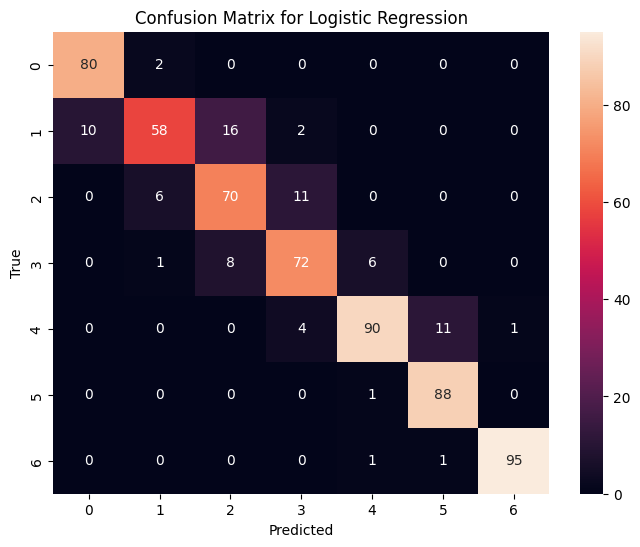

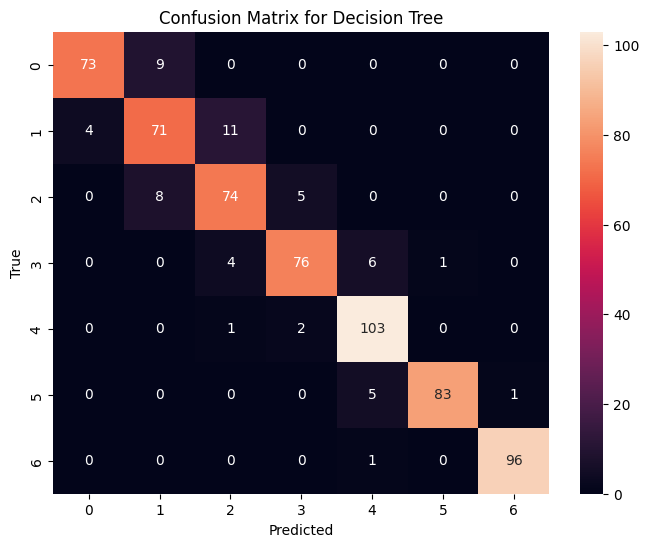

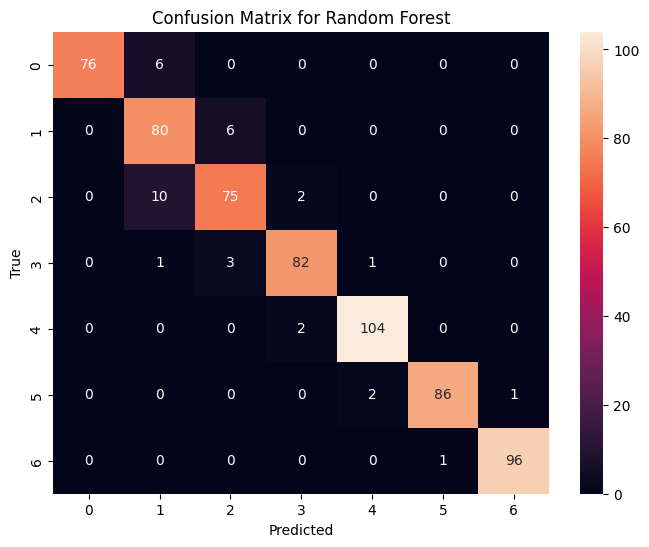

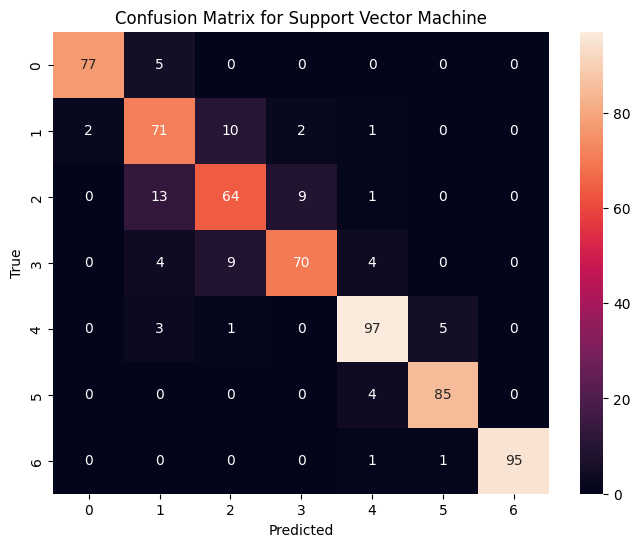

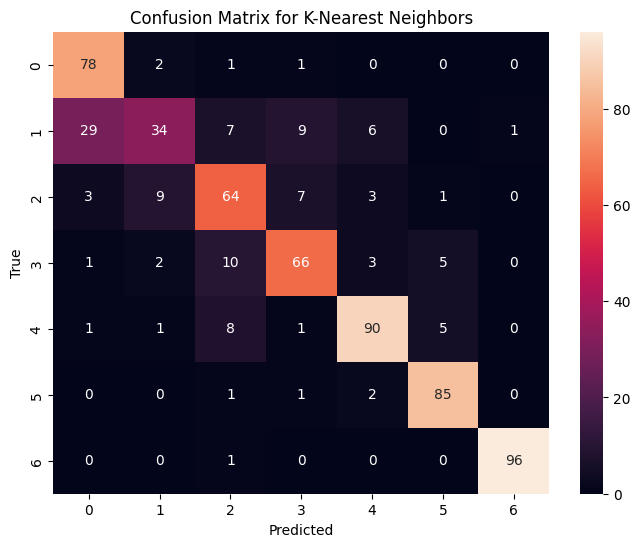

In [16]:
# Visualization - Confusion Matrices
for name in models.keys():
    plt.figure(figsize=(8,6))
    sns.heatmap(results[name]['Confusion Matrix'], annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

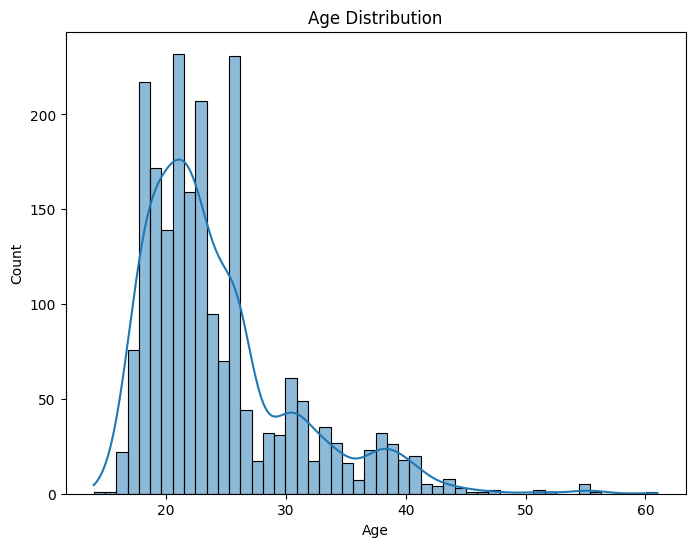

In [17]:
# Dataset Visualization
plt.figure(figsize=(8,6))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

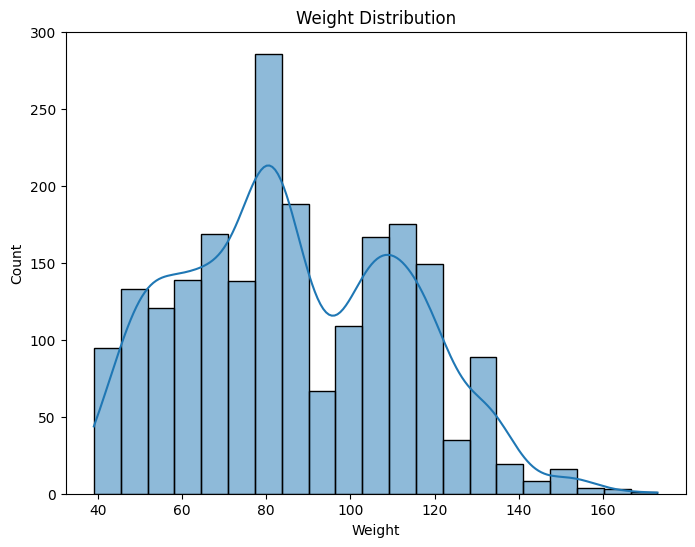

In [18]:
plt.figure(figsize=(8,6))
sns.histplot(data['Weight'], kde=True)
plt.title('Weight Distribution')
plt.show()


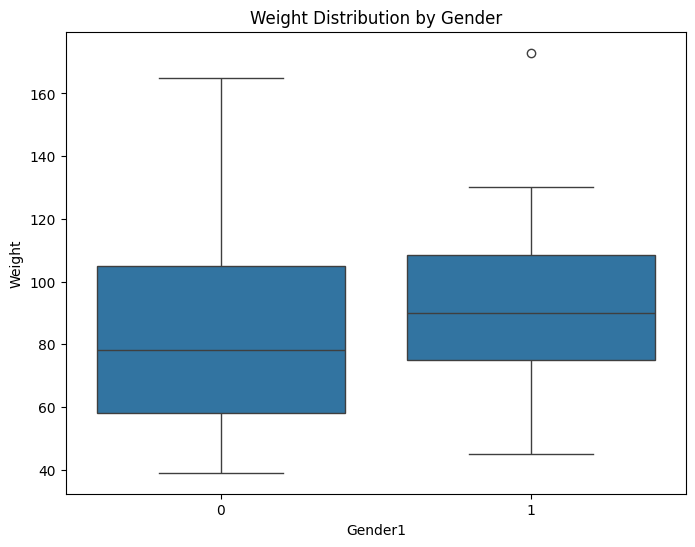

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Gender1', y='Weight', data=data)
plt.title('Weight Distribution by Gender')
plt.show()

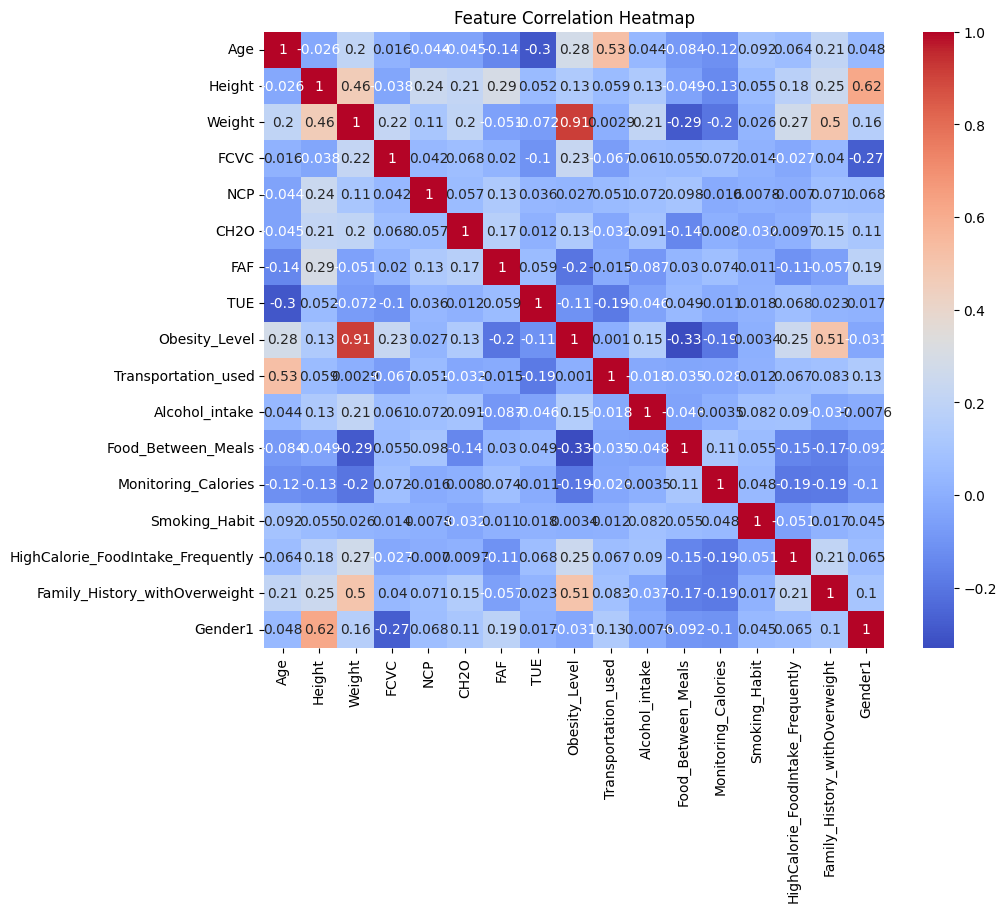

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [21]:
# Feature Importance for Random Forest
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

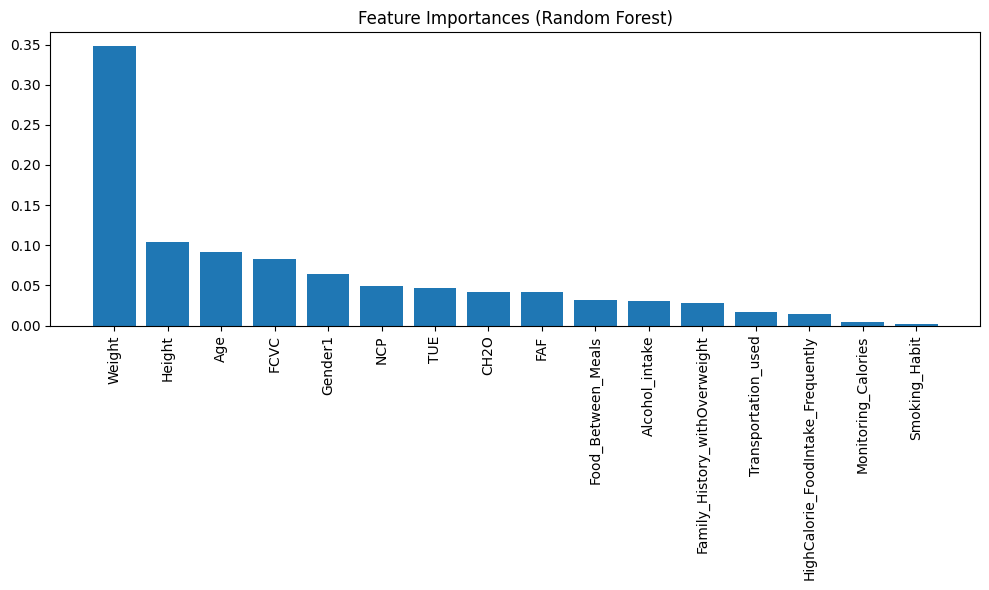

In [22]:
plt.figure(figsize=(10,6))
plt.title('Feature Importances (Random Forest)')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

In [23]:
# Displaying summary and finding best model
best_model = None
best_accuracy = 0

In [24]:
for model_name, metrics in results.items():
    print(f"\n=== {model_name} ===")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("Classification Report:")
    print(pd.DataFrame(metrics['Classification Report']).transpose())


=== Logistic Regression ===
Accuracy: 0.8722
Classification Report:
              precision    recall  f1-score    support
0              0.888889  0.975610  0.930233   82.00000
1              0.865672  0.674419  0.758170   86.00000
2              0.744681  0.804598  0.773481   87.00000
3              0.808989  0.827586  0.818182   87.00000
4              0.918367  0.849057  0.882353  106.00000
5              0.880000  0.988764  0.931217   89.00000
6              0.989583  0.979381  0.984456   97.00000
accuracy       0.872240  0.872240  0.872240    0.87224
macro avg      0.870883  0.871345  0.868299  634.00000
weighted avg   0.874073  0.872240  0.870436  634.00000

=== Decision Tree ===
Accuracy: 0.9085
Classification Report:
              precision    recall  f1-score     support
0              0.948052  0.890244  0.918239   82.000000
1              0.806818  0.825581  0.816092   86.000000
2              0.822222  0.850575  0.836158   87.000000
3              0.915663  0.873563  0.89

In [25]:
best_model = max(results, key=lambda x: results[x]['Accuracy'])
best_accuracy = results[best_model]['Accuracy']



Model Accuracies:
Logistic Regression: 0.8722
Decision Tree: 0.9085
Random Forest: 0.9448
Support Vector Machine: 0.8817
K-Nearest Neighbors: 0.8091

The model with the best accuracy is: Random Forest with an accuracy of 0.9448


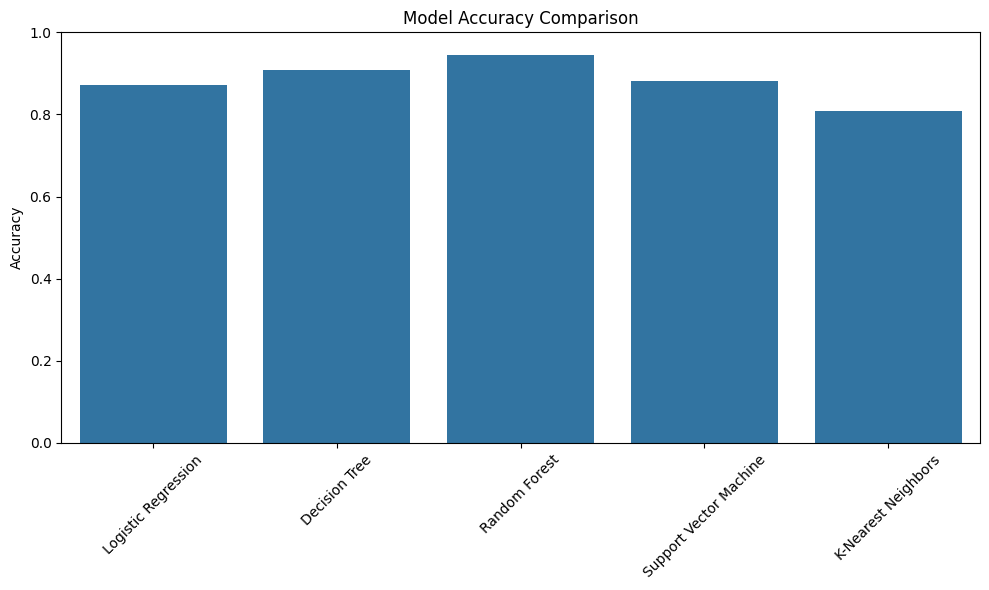

In [26]:
# Define accuracies dictionary
accuracies = {model_name: metrics['Accuracy'] for model_name, metrics in results.items()}

# Print model accuracies and plot comparison
print("\nModel Accuracies:")
for model, acc in accuracies.items():
    print(f"{model}: {acc:.4f}")

print(f"\nThe model with the best accuracy is: {best_model} with an accuracy of {best_accuracy:.4f}")

# Accuracy comparison plot
plt.figure(figsize=(10,6))
plt.title('Model Accuracy Comparison')
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


Ensemble Model Performance:
Accuracy: 0.9432

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        82
           1       0.84      0.91      0.87        86
           2       0.90      0.85      0.88        87
           3       0.94      0.94      0.94        87
           4       0.95      0.99      0.97       106
           5       0.99      0.97      0.98        89
           6       1.00      0.99      0.99        97

    accuracy                           0.94       634
   macro avg       0.94      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634


Confusion Matrix:
[[ 77   5   0   0   0   0   0]
 [  1  78   7   0   0   0   0]
 [  0   9  74   4   0   0   0]
 [  0   1   1  82   3   0   0]
 [  0   0   0   1 105   0   0]
 [  0   0   0   0   3  86   0]
 [  0   0   0   0   0   1  96]]

Individual Model Performance:
Logistic Regression: 0.8722
Decision Tree: 0.9117
Random Forest: 0

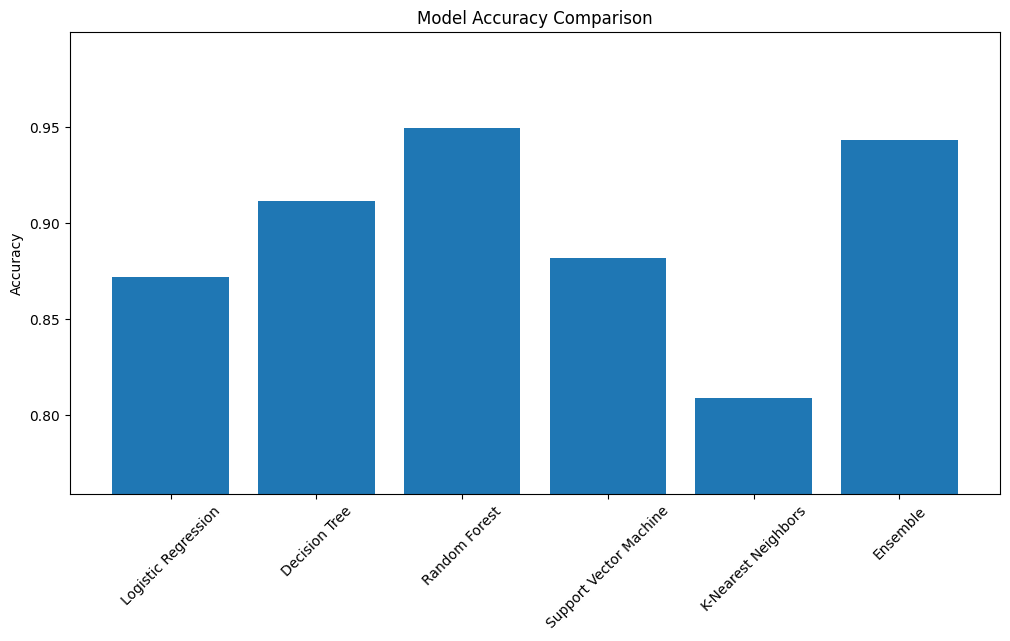

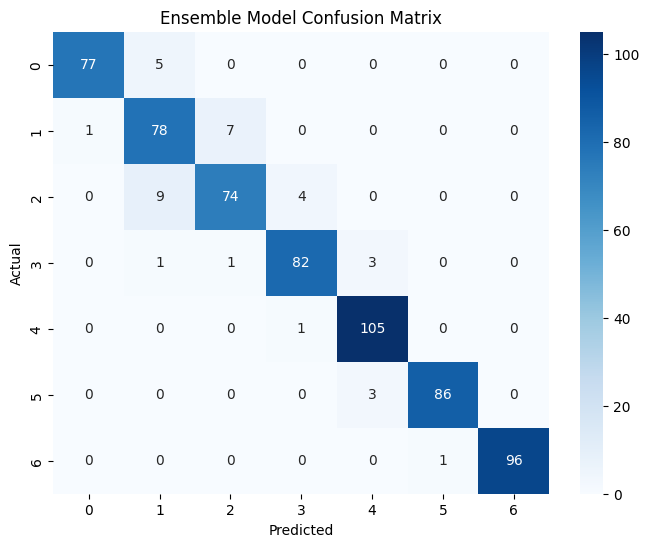

In [27]:
# Import all required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and prepare the data (from original notebook)
data = pd.read_csv('Obesity_Dataset_ML.csv')
X = data.drop('Obesity_Level', axis=1)
y = data['Obesity_Level']

# 2. Split data (from original notebook)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Scale features (from original notebook)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Create individual models (from original notebook)
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# 5. Create and train the ensemble model
ensemble = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('dt', DecisionTreeClassifier()),
        ('rf', RandomForestClassifier()),
        ('svm', SVC(probability=True)),
        ('knn', KNeighborsClassifier())
    ],
    voting='soft'
)

ensemble.fit(X_train_scaled, y_train)

# 6. Make predictions and evaluate
y_pred_ensemble = ensemble.predict(X_test_scaled)

print("Ensemble Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ensemble):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ensemble))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ensemble))

# 7. Compare with individual models
print("\nIndividual Model Performance:")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{name}: {accuracy_score(y_test, y_pred):.4f}")

# 8. Visualizations
plt.figure(figsize=(12, 6))
model_names = list(models.keys()) + ['Ensemble']
accuracies = [accuracy_score(y_test, model.predict(X_test_scaled)) for model in models.values()] + [accuracy_score(y_test, y_pred_ensemble)]

plt.bar(model_names, accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(min(accuracies)-0.05, max(accuracies)+0.05)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_ensemble), annot=True, fmt='d', cmap='Blues')
plt.title('Ensemble Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

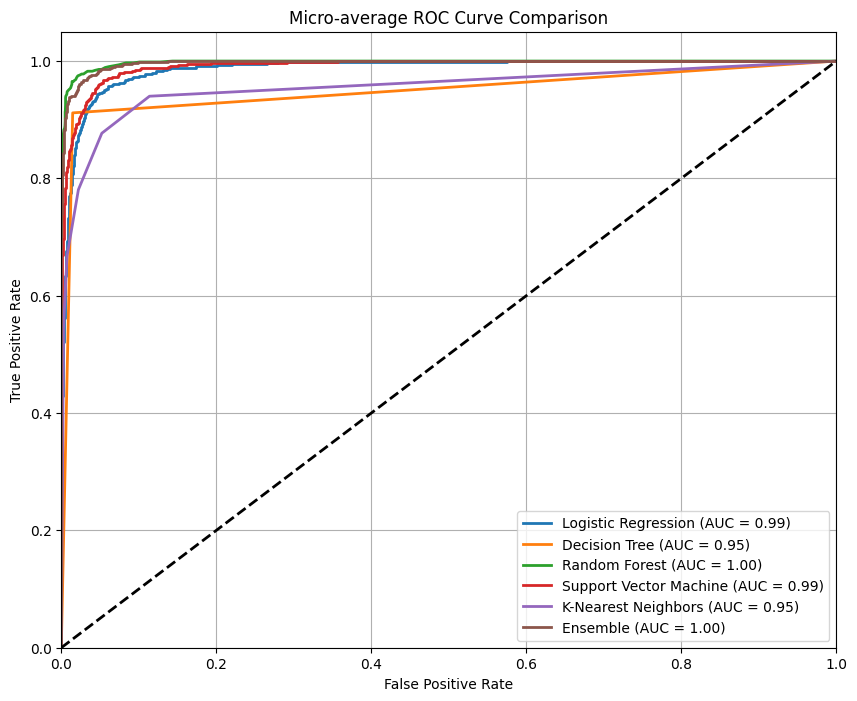

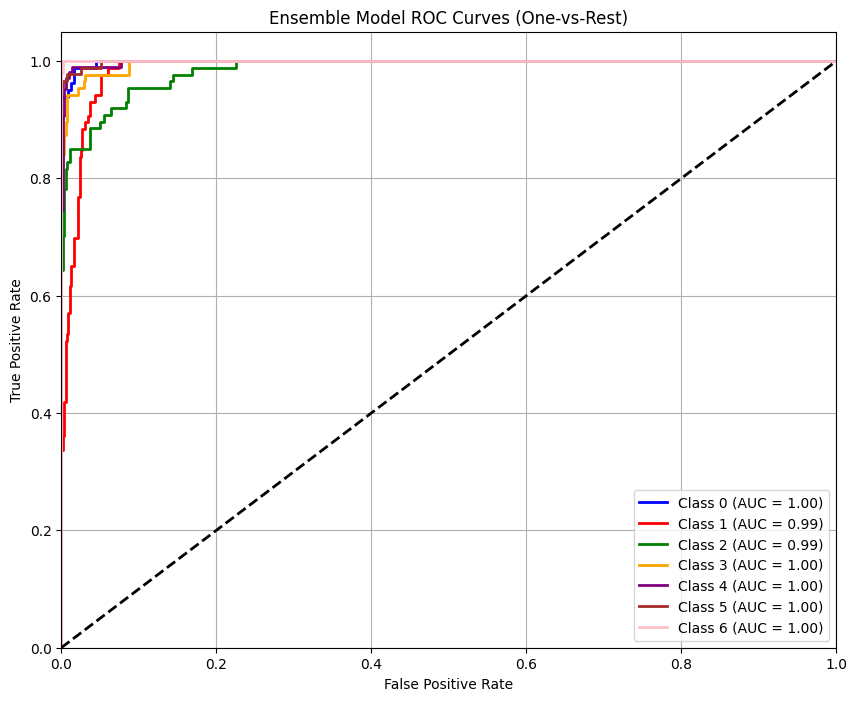


Micro-average AUC Scores:
Logistic Regression: 0.9872
Decision Tree: 0.9485
Random Forest: 0.9974
Support Vector Machine: 0.9916
K-Nearest Neighbors: 0.9547
Ensemble: 0.9968

Ensemble Model Class-wise AUC Scores:
Class 0: 0.9988
Class 1: 0.9871
Class 2: 0.9851
Class 3: 0.9963
Class 4: 0.9985
Class 5: 0.9990
Class 6: 1.0000


In [29]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output for multiclass ROC
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Initialize dictionaries to store ROC metrics
fpr = dict()
tpr = dict()
roc_auc = dict()

# 1. Calculate ROC for each individual model and ensemble
all_models = {**models, 'Ensemble': ensemble}  # Combine individual models and ensemble

for model_name, model in all_models.items():
    # Get probability scores
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_scaled)
    else:  # For SVM without probability estimates
        y_score = model.decision_function(X_test_scaled)
        # For SVM decision function, we may need to normalize
        y_score = (y_score - y_score.min()) / (y_score.max() - y_score.min())
    
    # Compute ROC curve and AUC for each class
    for i in range(n_classes):
        fpr[(model_name, i)], tpr[(model_name, i)], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[(model_name, i)] = auc(fpr[(model_name, i)], tpr[(model_name, i)])
    
    # Compute micro-average ROC curve and AUC
    fpr[(model_name, "micro")], tpr[(model_name, "micro")], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc[(model_name, "micro")] = auc(fpr[(model_name, "micro")], tpr[(model_name, "micro")])

# 2. Plot micro-average ROC curves for all models
plt.figure(figsize=(10, 8))
for model_name in all_models.keys():
    plt.plot(fpr[(model_name, "micro")], tpr[(model_name, "micro")],
             label='{0} (AUC = {1:0.2f})'
                   ''.format(model_name, roc_auc[(model_name, "micro")]),
             linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# 3. Plot one-vs-all ROC curves for the ensemble model
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray'][:n_classes]

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[("Ensemble", i)], tpr[("Ensemble", i)], color=color,
             label='Class {0} (AUC = {1:0.2f})'
             ''.format(classes[i], roc_auc[("Ensemble", i)]),
             linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ensemble Model ROC Curves (One-vs-Rest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# 4. Print AUC scores
print("\nMicro-average AUC Scores:")
for model_name in all_models.keys():
    print(f"{model_name}: {roc_auc[(model_name, 'micro')]:.4f}")

print("\nEnsemble Model Class-wise AUC Scores:")
for i in range(n_classes):
    print(f"Class {classes[i]}: {roc_auc[('Ensemble', i)]:.4f}")